In [ ]:
from google.colab import files
import pandas as pd
import os
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
#from pandas_profiling import ProfileReport
from nltk.stem.porter import PorterStemmer
from nltk import tokenize
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
nltk.download('stopwords')
#nltk.download('punkt')
stopwrds = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#uploaded = files.upload()

In [ ]:
for dirpath, _, filenames in os.walk('/content/drive/MyDrive/Dataset/True.csv'):
  for filename in filenames:
     print(os.path.join(dirpath, filename)) #соединяем путь до папок и входящие в эти папки файлы с помощью метода path.join()

In [ ]:
true = pd.read_csv('../content/drive/MyDrive/Dataset/True.csv') # прочитали датасет "настоящих" нововстей
true['flag'] = 1 # добавляем поле flag c меткой 1 для "настоящех" новостей
true.head()


,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake = pd.read_csv('../content/drive/MyDrive/Data_set/Fake.csv') #прочитали датасет  "поддельных" новостей
fake['flag'] = 0 # добавляем поле flag c меткой 0 для "поддельных" новостей
fake.head()

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df = pd.concat([fake, true]) # собираем датасеты в один)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   flag     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


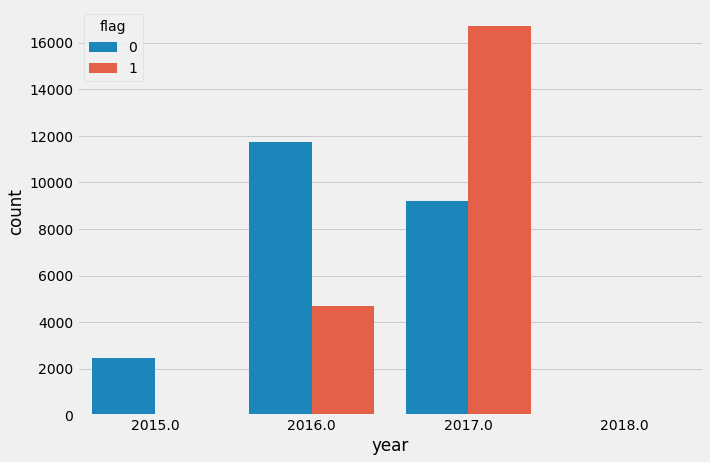

In [ ]:
# Попрубем посмотреть количество настоящих и подельных новостей по годам
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='year', hue ='flag')

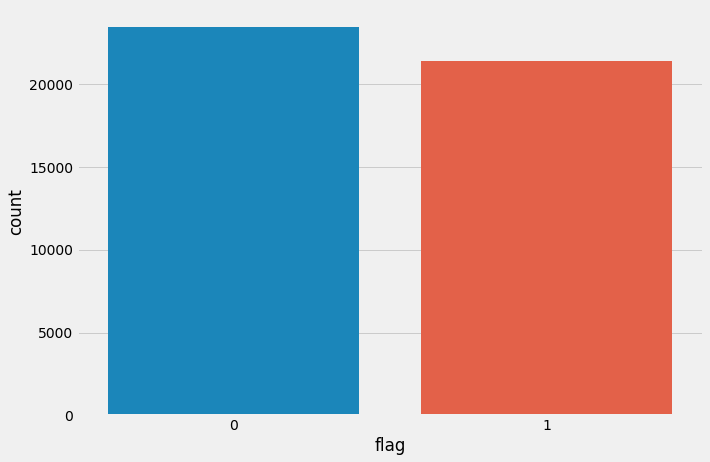

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='flag')

In [ ]:
df.drop(['subject', 'date', 'title', 'year'], axis = 1, inplace = True) # оставляем только важные строки для предсказания
df['text'].dropna(inplace = True) #удаляем пустые строки в общем сете
df['text'] = df['text'].apply(lambda x: x.lower()) #преведем к нижнему регистру
df['text'] = df['text'].apply(lambda x: x.translate({ord(i): None for i in string.punctuation}))#заменям пунктуцию на яйчейки пустой таблицы
df['text'] = df['text'].apply(lambda x: x.translate({ord(i): None for i in string.digits}))#то же с цифрами
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwrds])) #оставляем все что не в "стопвордс"
porter_stemmer = PorterStemmer()
df['text'] = df['text'].apply(porter_stemmer.stem) # производим "стемминг")

df.head()


,text,flag
0,donald trump wish americans happy new year lea...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


In [ ]:
df.sample(5)

,text,flag
9240,four chicago thugs videotaped brutal tortured ...,0
14940,london reuters hundreds people displaced fire ...,1
20368,antiestablishment tide rolling across europe r...,0
8193,washington reuters four republican members con...,1
19405,walmart pulled bulletproof black lives matter ...,0


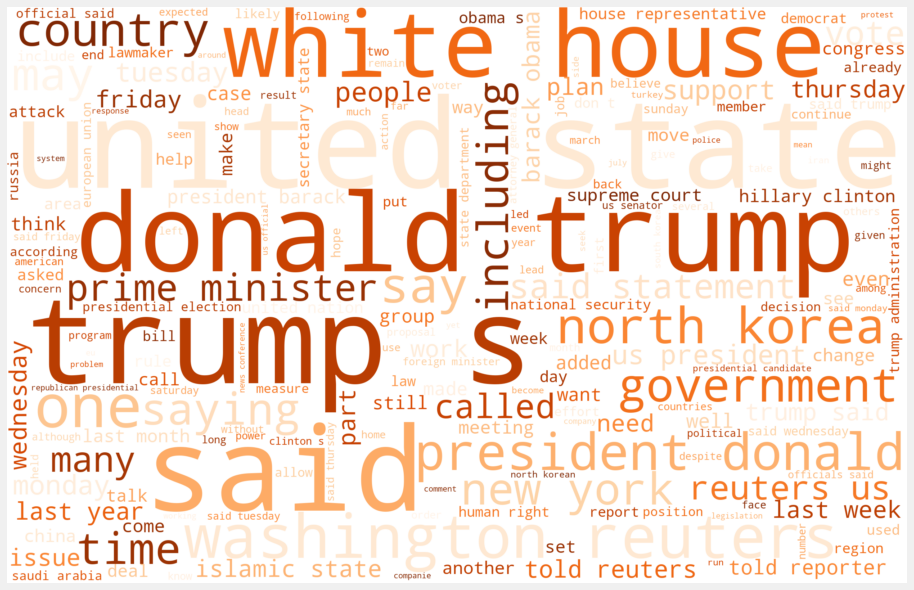

In [ ]:
true_words = df[df['flag'] == 1]
words = ' '.join([text for text in true_words.text])
wordcloud_true = WordCloud(background_color="White",
                               colormap = 'Oranges',
                               max_words=200,
                               width=2500,
                               height=1600).generate(words)
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



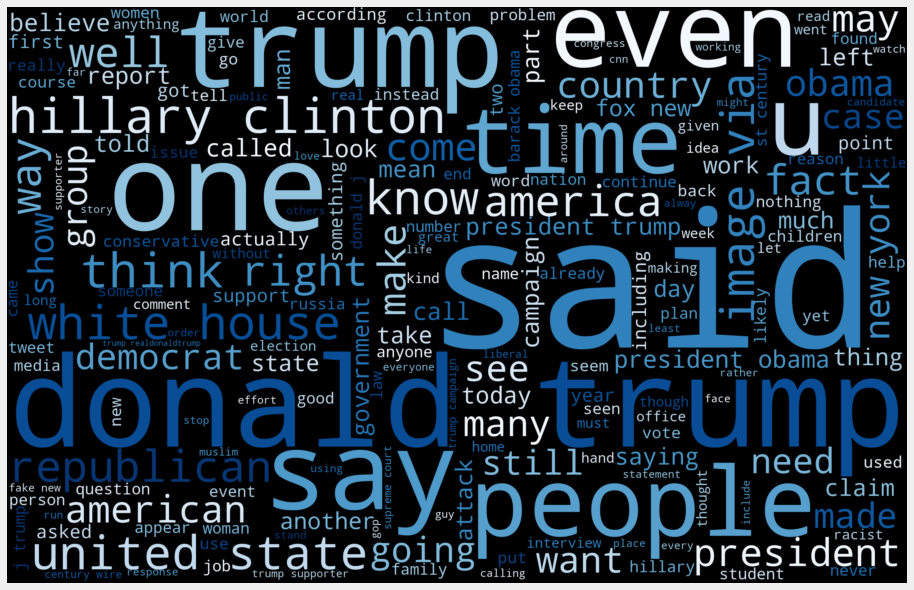

In [ ]:
fake_words = df[df['flag'] == 0]
wordcloud_true = WordCloud(background_color="black",
                               colormap = 'Blues',
                               max_words=200,
                               width=2500,
                               height=1600).generate( ' '.join([text for text in fake_words.text]))
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
tokenizer = tokenize.WhitespaceTokenizer()
#df.Firm_Name.str.split(expand=True).stack().value_counts()
#df.Firm_Name.str.split().explode().value_counts()
def freq_words(text, col, sum):
  frequency = FreqDist(tokenizer.tokenize(' '.join([word for word in text[col]])))
  df_freq = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
  df_freq = df_freq.nlargest(columns ="Frequency", n = sum)

  return(df_freq)

False_Word_Freq = freq_words(df[df['flag'] == 0], 'text', 20)
True_Word_Freq = freq_words(df[df['flag'] == 1], 'text', 20)


In [ ]:
True_Word_Freq['flag'] = 1
False_Word_Freq['flag'] = 0
df_freq = pd.concat([False_Word_Freq, True_Word_Freq])
df_freq.head()

,Word,Frequency,flag
1,trump,73933,0
251,said,31013,0
85,people,25931,0
33,president,25566,0
71,would,23427,0


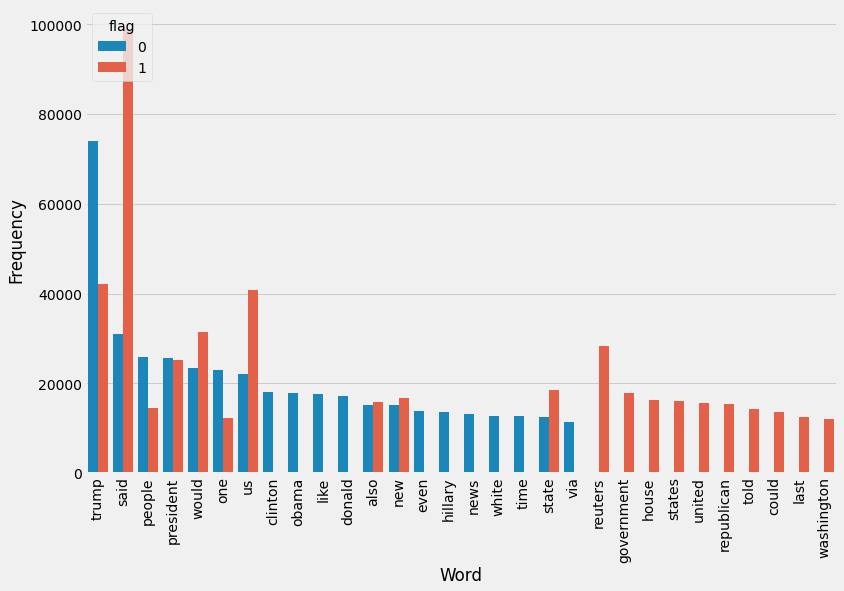

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
ax = sns.barplot(data = df_freq, x = "Word", y = "Frequency", hue = 'flag')
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['flag'], test_size=0.2, random_state=1490) #делим сет на тренировочную и теств=овую части: 2 к 8, предварительно перемешивая его

In [ ]:
my_pipe = Pipeline([('tfidf', TfidfVectorizer()), ('model', LinearSVC())]) #в пайплан пошагово включаем модуль TfidfVectorizer для преобразования "документов" в матрицу признаков TF-IDF, и LinearSVC  (метод опорных векторов с вшитым гипераметром ядро - "линейное", который советуют использовать для выборок больше 10000) в качестве классификатора
# гиперпараметр C-параметр регулярязации в документации использование значения по-умолчанию 1.0 описано как разумное
my_model = my_pipe.fit(x_train, y_train) # обучаем модель на тренировочной выборке
my_predict = my_model.predict(x_test) # проверяем модель на тестовой
tn, fp, fn, tp = metrics.confusion_matrix(y_test, my_predict).ravel()
specificity = (tn/(tn+fp))*100
print(f'Accuracy:{round(metrics.accuracy_score(y_test, my_predict)*100,2)}%')
print('Sensitivity:', (metrics.recall_score(y_test, my_predict)*100), '%')
print('Specificity:', specificity, '%')
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, my_predict))


Accuracy:99.65%
Sensitivity: 99.69590643274854 %
Specificity: 99.61742826780021 %
Confusion Matrix: 
 [[4687   18]
 [  13 4262]]


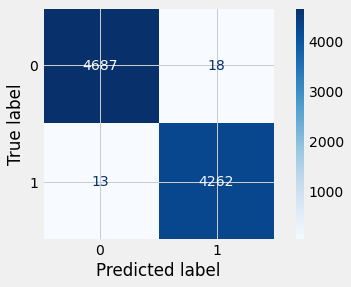

<Figure size 1080x576 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, my_predict, cmap = 'Blues')
plt.figure(figsize = (15, 8))
plt.show()

In [ ]:
#print(df.iloc[0]) первую строку прочитали для примера

In [ ]:
#def optimise(text): # оригинальная функция для стеминга, в лямбду передалал
  #print('1', text)
 # optimised = text
  #porter_stemmer = PorterStemmer()

  #porter_stemmer.stem(optimised)

  #return optimised
#df['text'] = df['text'].apply(optimise)

#df.head()

from google.colab import data_table

data_table.enable_dataframe_formatter()

— эта фича (а конкретно, её сортировка и фильтры) из вступительного видео в обучающем ноутбуке с базовой информацией о Colab — просто топчик, спасибо!